## 1. Vibration in a one-dimensional system
질량이 $m$인 $N$개의 동일한 물체가 일렬로 동일한 용수철에 매달려 있다. $i$번째 물체의 운동방정식은 다음처럼 주어진다.
$$m \frac{d^2 x_i}{dt^2} = k(x_{i+1}-x_{i}) - k(x_i-x_{i-1})$$
한쪽 끝에서 연결된 용수철에 주기적인 힘($F$)을 가하고 있다. 그러면 양 끝단에 물체에 운동방정식은 다음과 같다.
$$m \frac{d^2 x_1}{dt^2} = k(x_{2}-x_{1}) + F \\
m \frac{d^2 x_N}{dt^2} = -k(x_{N}-x_{N-1})$$
만약 주기적인 힘이 $F=C e^{i wt}$로 주어지면 $x$는 다음의 $x_i(t)=a_i e^{iwt}$해를 가진다. 정리하면 다음과 같은 방정식을 얻을 수 있다.
$$(d -k)a_1 -k a_2 = C, \\
d a_i - k a_{i-1}- k a_{i+1} = 0, \\
(d - k)a_N - k x_{N-1} =0$$
여기에서 $d=2k-mw^2$이다.

위의 운동방정식을 행렬로 표현하면 다음과 같다.
$$Ma=b $$$$
M=
\begin{pmatrix}
d-k &amp; -k &amp; 0 &amp; 0 &amp; 0 &amp; \cdots \\
-k &amp; d &amp; -k &amp; 0 &amp; 0 &amp; \cdots \\
0 &amp; -k &amp; d &amp; -k &amp; 0 &amp; \cdots \\
\cdots &amp;\cdots &amp;\cdots &amp;\cdots &amp;\cdots &amp; \cdots  \\
0 &amp; 0 &amp; 0&amp; 0&amp; -k &amp; d-k 
\end{pmatrix}, \quad
a=
\begin{pmatrix}
a_1 \\ 
a_2 \\ 
a_3 \\ 
\cdots \\ 
a_N  
\end{pmatrix}, \quad
b=
\begin{pmatrix}
C \\ 
0 \\ 
0 \\ 
\cdots \\ 
0 
\end{pmatrix}
$$

* $m=1$, $k=1$, $C=1$, $N=40$으로 고정하세요.
* $w$ (즉, d)를 바꾸어가면서 $a_i$를 구하세요.
* 이를 그래프로 표현하고 의미를 설명하세요. x축이 i (1~N), y축이 $a_i$


* 40X40 행렬을 직접 입력하는 것을 금지하지는 않지만 그렇게 하지 않기를 바랍니다.
* np.zeros(n) 함수는 크기가 n이며 모든 성분이 0인 배열을 만드는 명령어입니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

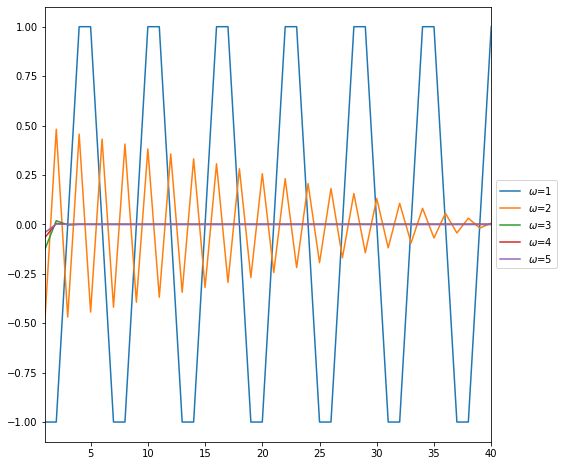

In [2]:
def M(N,w):
    i=0
    j=[]
    m, k = 1, 1
    d = 2*k-m*(w**2)
    M1 = np.array([-k,d,-k])
    while (i<N-2):
        M=(np.hstack([np.zeros(i),M1,np.zeros(N-3-i)]))
        i+=1
        j.append(M)
    return(j)
def matrix(N,w):
    m, k = 1, 1
    d = 2*k-m*(w**2)
    M2 = np.array([d-k,-k])
    M3 = np.array([-k,d-k])
    M4 = np.hstack([M2,np.zeros(N-2)])
    M5 = np.hstack([np.zeros(N-2),M3])
    return np.vstack([M4,M(N,w),M5])

def b1(N,C):
    i=1
    g=[]
    while(i<N):
        b1=np.vstack([np.zeros(i-i+1)])
        i+=1
        g.append(b1)
    return(g)

def b2(N,C):
    return np.vstack(b1(N,C))

def b(N,C):
    b=np.array([C])
    return np.vstack([b,b2(N,C)])

plt.figure(figsize=(8,8))
x=np.arange(1,41)
plt.xlim(1,40)
a1=np.dot(np.linalg.inv(matrix(40,1)),b(40,1))
a2=np.dot(np.linalg.inv(matrix(40,2)),b(40,1))
a3=np.dot(np.linalg.inv(matrix(40,3)),b(40,1))
a4=np.dot(np.linalg.inv(matrix(40,4)),b(40,1))
a5=np.dot(np.linalg.inv(matrix(40,5)),b(40,1))
plt.plot(x,a1,label='$\omega$=1')
plt.plot(x,a2,label='$\omega$=2')
plt.plot(x,a3,label='$\omega$=3')
plt.plot(x,a4,label='$\omega$=4')
plt.plot(x,a5,label='$\omega$=5')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* x축은 i번째 물체를 나타내며 y축은 $x_i(t)=a_i e^{iwt}$에서 $a_i$ 즉 i번째 물체의 운동 진폭을 나타낸다.



* d=$\omega$일 때 3의 배수번째 물체는 움직이지 않고, 이를 기준으로 양 옆의 두 물체는 반대편의 두 물체와 반대방향으로 같은 진폭으로 움직인다. (1,2 번째 -1, 3번째 0, 4,5번째 1)


* d<$\omega$일 때 물체는 이전의 물체와 반대방향으로 더 작은 진폭으로 움직인다.


* d가 $\omega$보다 더 작아질수록 물체의 진폭은 0에 수렴하는 운동을 한다.

## 2. 양쪽 끝에서 힘을 가하면 어떻게 되는가?
즉, b행렬이 다음과 같은 경우에 대해서 살펴보아라.$$
b=
\begin{pmatrix}
C \\ 
0 \\ 
0 \\ 
\cdots \\ 
C 
\end{pmatrix}
$$

* $m=1$, $k=1$, $C=1$, $N=40$으로 고정하세요.
* $w$ (즉, d)를 바꾸어가면서 $a_i$를 구하세요.
* 이를 그래프로 표현하고 의미를 설명하세요.

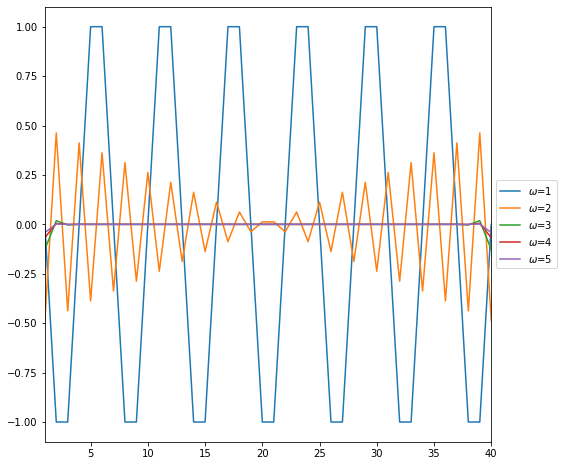

In [5]:
def M(N,w):
    i=0
    j=[]
    m, k = 1, 1
    d = 2*k-m*(w**2)
    M1 = np.array([-k,d,-k])
    while (i<N-2):
        M=(np.hstack([np.zeros(i),M1,np.zeros(N-3-i)]))
        i+=1
        j.append(M)
    return(j)
def matrix(N,w):
    m, k = 1, 1
    d = 2*k-m*(w**2)
    M2 = np.array([d-k,-k])
    M3 = np.array([-k,d-k])
    M4 = np.hstack([M2,np.zeros(N-2)])
    M5 = np.hstack([np.zeros(N-2),M3])
    return np.vstack([M4,M(N,w),M5])

def b1(N,C):
    i=1
    g=[]
    while(i<N-1):
        b1=np.vstack([np.zeros(i-i+1)])
        i+=1
        g.append(b1)
    return(g)

def b2(N,C):
    return np.vstack(b1(N,C))

def b(N,C):
    b=np.array([C])
    return np.vstack([b,b2(N,C),b])

plt.figure(figsize=(8,8))
x=np.arange(1,41)
plt.xlim(1,40)
a1=np.dot(np.linalg.inv(matrix(40,1)),b(40,1))
a2=np.dot(np.linalg.inv(matrix(40,2)),b(40,1))
a3=np.dot(np.linalg.inv(matrix(40,3)),b(40,1))
a4=np.dot(np.linalg.inv(matrix(40,4)),b(40,1))
a5=np.dot(np.linalg.inv(matrix(40,5)),b(40,1))
plt.plot(x,a1,label='$\omega$=1')
plt.plot(x,a2,label='$\omega$=2')
plt.plot(x,a3,label='$\omega$=3')
plt.plot(x,a4,label='$\omega$=4')
plt.plot(x,a5,label='$\omega$=5')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* x축은 i번째 물체를 나타내며 y축은 $x_i(t)=a_i e^{iwt}$에서 $a_i$ 즉 i번째 물체의 운동 진폭을 나타낸다.


* d=$\omega$일 때 1, 40번째 물체와 이를 기준으로 3의 배수번째 물체(4번째, 37번째 등)는 움직이지 않으며, 사이의 물체들이 그 다음 사이의 물체들과 서로 반대방향으로 같은 진폭으로 움직인다. (2,3 번째 -1, 4번째 0, 5,6번째 1, 39,38 번째 -1, 37번째 0, 36,35번째 1)


* d<$\omega$일 때 가운데 물체의 진폭이 0에 수렴하며 이를 기준으로 양 옆에서 가운데로 갈수록 이전의 물체와 반대방향으로 더 작은 진폭으로 움직인다. 


* d가 $\omega$보다 더 작아질수록 물체는 진폭이 0에 수렴하는 운동을 한다.

글쎄요.. 예를 들어 w=1.42 같은 경우는 어떻습니까? (-1.5)